## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Get the shape of the dataframe
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# Get number of unique user ids
df.nunique().user_id

290584

d. The proportion of users converted.

In [5]:
# Get proportion of uniuqe users, that converted
df.query('converted == 1').nunique().user_id/df.nunique().user_id

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Check, how many times new page and treatment dont match
df[(df['landing_page'] == 'new_page') & (df['group']!= 'treatment')].shape[0] +df[(df['landing_page'] != 'new_page') & (df['group']== 'treatment')].shape[0]


3893

f. Do any of the rows have missing values?

In [7]:
# Checking for missing values in the dataframe
df.isnull().values.any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Drop all rows, where new page and treatment dont match
df2 = df.drop(df[(df['landing_page'] == 'new_page') & (df['group']!= 'treatment')].index)
df2 = df2.drop(df[(df['landing_page'] != 'new_page') & (df['group']== 'treatment')].index);

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Check, how many unique user ids there are in the dataframe
df2.nunique().user_id

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Get all rows, where the user id is dublicated
df2[df2.duplicated(subset = 'user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
# Show the rows, where the user id from above matches
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Drop the first of both rows from above
df2.drop(labels = 1899, axis = 0, inplace = True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Compute probability, that a user converts for whole dataset
df2[df2['converted']==1].shape[0]/ df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Compute probability, that a user converts for whole dataset, given that he is in the control group
control = df2['group']=='control'
df2[control].query('converted =="1"').shape[0]/df2[control].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Compute probability, that a user converts for whole dataset, given that he is in the treatment group
treatment = df2['group']=='treatment'
df2[treatment].query('converted =="1"').shape[0]/df2[treatment].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# Compute probability, that a user receives the new page
new_page = df2['landing_page']=='new_page'
df2[new_page].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Answer: Since the probability to convert decreases from 12.0% in the control group to 11.9% in the treatment group, there is no sufficient evidence, that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

The hypothesis are the following: 
<br>$H_0: p_{old} \geq p_{new}\\ H_1: p_{new} > p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [19]:
# Compute p_new
p_new =df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
# Under the null p_new is the same as p_old
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# Compute n_new
n_new = df2[df2['group']=='treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
# Compute n_old
n_old = df2[df2['group']=='control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# Create a binomial distribution with the assumption, that the null is true
new_page_converted = np.random.binomial(1, p_new,n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# Create a binomial distribution with the assumption, that the null is true
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean()-old_page_converted.mean()

-0.0014819989748308393

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [43]:
p_diffs = []
# Simulate the difference of proportions 10000 times 
for _ in range(10000):
    old_page_converted =  np.random.binomial(1, p_old, n_old)
    new_page_converted = np.random.binomial(1, p_new,n_new)
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

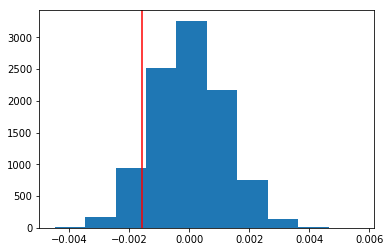

In [27]:
# Compute the observed difference in converstion for control and treatment group
obs_diff = df2.query('group == "treatment"').converted.mean()-df2.query('group == "control"').converted.mean()
# Plot the simulated distribution of the null and the observed difference
plt.hist(np.array(p_diffs))
plt.axvline(x=obs_diff, color ='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
#Compute the p-value
p_val =(np.array(p_diffs)>obs_diff).mean()
p_val

0.90700000000000003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Answer: The computed value is called p-value and it describes the probability to get the observed statistic or a more extremer under the assumption, that the null hypothesis is true. Since there is a probability of 0.895  to get the observev or an extremer statistic, the null hypothesis cant be rejected, based on a type 1 error of 0.05.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
# Get number of rows, which have the old page and are converted
convert_old = df2[df2['landing_page']=='old_page'].query('converted == 1').shape[0]
convert_old

17489

In [31]:
import statsmodels.api as sm
# Get number of rows, which are converted  for old and new page. 
convert_old = df2[df2['landing_page']=='old_page'].query('converted == 1').shape[0]
convert_new = df2[df2['landing_page']=='new_page'].query('converted == 1').shape[0]

#Get number of rows, which have the old page and new page
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_new = df2[df2['landing_page']=='new_page'].shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [32]:
#Compute z-score and p-value
stat, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new,n_old], alternative='larger')
stat, pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Answer: The p-value is 0.905 and thus the null hypothesis cant be rejected. Its nearly the same value we computed in part j vor the p-value. The z-score of -1.31 indicates, that the proportion in the old-page group $p_{new}$ is 1.31 standard deviations smaller than the proportion of the old-page group $p_{old}$. Since the the alternative hypothesis claims, that the $p_{new}$ is larger than $p_{old]$, this is a strong indicator, that the alternative is wrong

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In this case we need a logistic regression, because our depenend variable is a categorical one.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
#Create dummy variables
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2[['ab_page', 'control']] = pd.get_dummies(df2['group'])
df2['intercept'] = 1
df2.head(1)

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,control,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
#Create logistig regression modell and fit it
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
#show the results
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-06 18:48 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-Value associated with ab-page is 0.1899. It differs from the one of Part II because this in this case it only indicates, whether the ab-page variable is statistically significant in predicting, whether the user converts or not. Because the p-value is larger than 0.05, the null hypothesis is true and the ab-page variable seems to be not statistically significant to predicting the conversion of a user.

Regression Model hypothesis:

* Null: ab-page is not statistically significant in predicting the conversion of a user

* Alternative: ab-page is statistically significant in predicting the conversion of a user





f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Basically spoken, more data means more information, that could possibly be statistically significant in predecting the conversion. However we need to be careful, which data we add to our model, because there are some problems related to multiple logistic/linear regression. Those are:
* Non-linearity of the response response-predictor relationship
* Correlation of error terms
* Non-constant variance and normally distributed errors
* Outliers/high leverage points
* Multicollinearity of the predictor variables

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
# Read csv
df_cou = pd.read_csv('countries.csv')
df_cou.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# Join the two dataframes on user id
df_join = df2.join(df_cou.set_index('user_id'), on='user_id');
df_join.head()


,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,control,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,0,1,US


In [39]:
# Show unique values of country column
df_join.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [40]:
# Add dummy variables
df_join[['CA', 'UK','US']] = pd.get_dummies(df_join['country'])

#Fit logistic regression model with variables intercept, UK and US. Baseline is CA
logit_mod_2 = sm.Logit(df_join['converted'], df_join[['intercept','UK','US']])
results = logit_mod_2.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-06 18:48 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [41]:
#Computation of the probability change, based on the coefficients of the predictor variables:
np.exp(0.0507), np.exp(0.0408)

(1.0520072437650141, 1.0416437559600236)

__Results__:<br>
Statistical Significance:<br>
* The p-value of 0.0740 of the UK-variable means, that the UK-variable is not statistically significant
* The p-value of 0.1291 of the US-variable means, that it the US-variable not statistically significant

Change of probability:<br>
The coefficient in the result summary indicates, how the probability of converting changes if the  predictor variable increases one unit. These probabilities were computed above.<br>
* The probability for converting for US is 1.05 times the probability in CA
* The probability for converting for UK is 1.04 times the probability in CA



h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
#Create interactions of ab-page and country dummy variables
df_join['ab_page_UK_interaction'] = df_join['ab_page'] * df_join['UK']
df_join['ab_page_US_interaction'] = df_join['ab_page'] * df_join['US']

In [51]:
df_join.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,control,intercept,country,CA,UK,US,ab_page_UK_interaction,ab_page_US_interaction
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1,0,1,US,0,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1,0,1,US,0,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,0,1,1,US,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,0,1,1,US,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1,0,1,US,0,0,1,0,1


In [53]:
#Create log. regression model and fit it
logit_mod_3 = sm.Logit(df_join['converted'], df_join[['intercept','ab_page_UK_interaction','ab_page_US_interaction']])
results3 = logit_mod_3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              No. Iterations:     6.0000     
Dependent Variable:   converted          Pseudo R-squared:   0.000      
Date:                 2021-04-06 19:00   AIC:                212782.0722
No. Observations:     290584             BIC:                212813.8112
Df Model:             2                  Log-Likelihood:     -1.0639e+05
Df Residuals:         290581             LL-Null:            -1.0639e+05
Converged:            1.0000             Scale:              1.0000     
------------------------------------------------------------------------
                        Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
intercept              -2.0038   0.0079 -253.1933 0.0000 -2.0193 -1.9883
ab_page_UK_interaction  0.0116   0.0180    0.6429 0.5203 -0.0237  0.0468
ab_page_US_interaction  0.0173   0.0125    1.3881 0.1651 -0.0071  0.0417
========================================================================

"""

Result: 
* The interaction between ab-page and US is not statistical significant for conversion prediction (p-value is 0.17)
* The interaction between ab-page and UK is not statistical significant for conversion prediction (p-value is 0.64)

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])